# Bike Sharing Anaysis

##### Problem Statement:

BoomBikes, a US bike-sharing provider, has experienced a decline in revenue due to the COVID-19 pandemic and the accompanying lockdowns. To adapt and prepare for post-quarantine operations, the company is focusing on understanding the demand for shared bikes in the American market. They have enlisted a consulting firm to analyze various factors that influence bike-sharing demand. This includes analyzing significant variables that predict demand and understanding how these variables correlate with bike usage. The aim is to gather insights from a large dataset, which includes daily bike demand influenced by meteorological factors and user preferences. The ultimate business goal is to create a model that predicts shared bike demand. This model will inform management's business strategies, helping them meet customer expectations and adapt to new market dynamics.

##### Strategy:

We can break the problem down into 3 distinct steps in order to solve it.
- Data understanding, cleaning and exploration
- Data modelling and model tuning
- Prediction and inference

##### End objectives:

BoomBikes wants to know the following:
- Which factors are significant predictors of bike sharing demand?
- How well these factors actually predict the demand?

## Part I: Data reading, exploration and EDA

In [224]:
import numpy as np, pandas as pd
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let us check whether this dataset contains any missing values.

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no missing values in the data. 

We do not need the column `instant`, since it indicates the record index and nothing useful. So we can drop it.

In [226]:
data.drop('instant', axis = 1, inplace = True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Next, we identify the target variable as `cnt`, indicating total count of bike rentals, since this effectively quantifies the demand. This is a sum of the columns `casual` and `registered`. We have to drop the latter two columns because we need to predict the demand and `casual` and `registered` are causally related to `cnt`.

In [227]:
data.drop(['casual', 'registered'], axis = 1, inplace = True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Next we encode the column `yr` as 2018 and 2019 in order to make it more interpretable.

In [228]:
data[['yr']] = data[['yr']].apply(lambda x: x.map({0: 2018, 1: 2019}))
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Since we already have year, month, weekday/workday and season information, we can extract day of month from `dteday` column and drop it.

In [229]:
data['dteday'] = pd.to_datetime(data['dteday'], format = "%d-%m-%Y")
data['dayofmonth'] = data['dteday'].dt.day
data.drop('dteday', axis = 1, inplace = True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dayofmonth
0,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


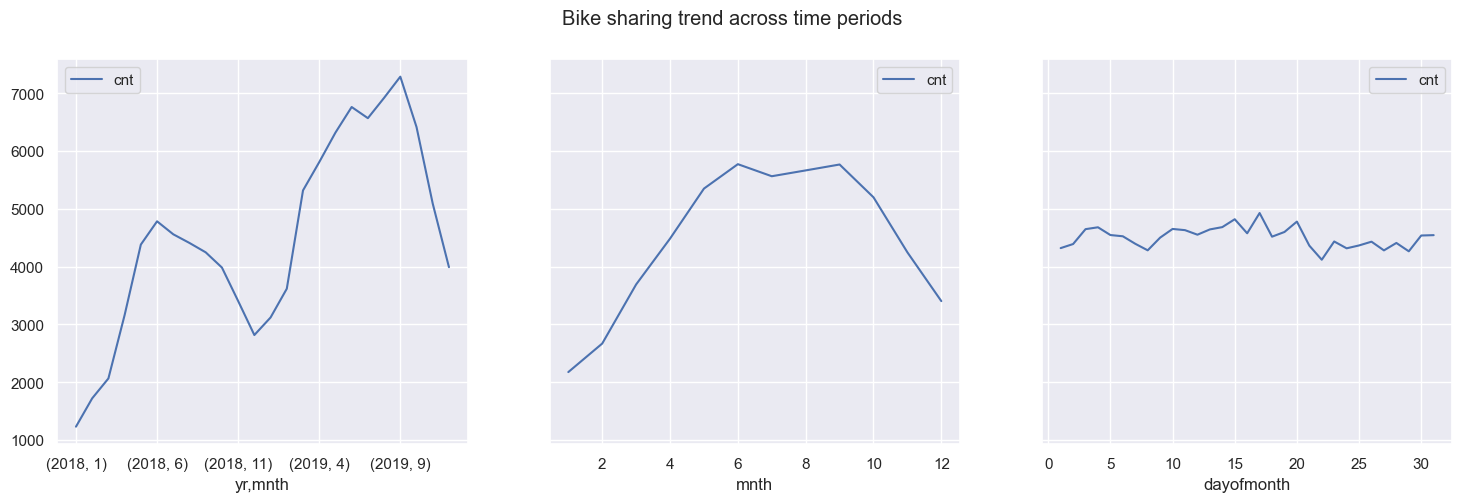

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,5)});

fig, ax = plt.subplots(1, 3, sharey = True);
data.groupby(['yr', 'mnth']).agg({'cnt': 'mean'}).plot(ax = ax[0]);
data.groupby(['mnth']).agg({'cnt': 'mean'}).plot(ax = ax[1]);
data.groupby(['dayofmonth']).agg({'cnt': 'mean'}).plot(ax = ax[2]);
fig.suptitle('Bike sharing trend across time periods');

Clearly, the total number of rentals varies significantly with year and month, but not so much by day of month. There is a general yearly upward trend from 2018-2019, but there is also a seasonal cycle where demand rises towards the middle of the year but is significatly lower towards the beginning and the end.

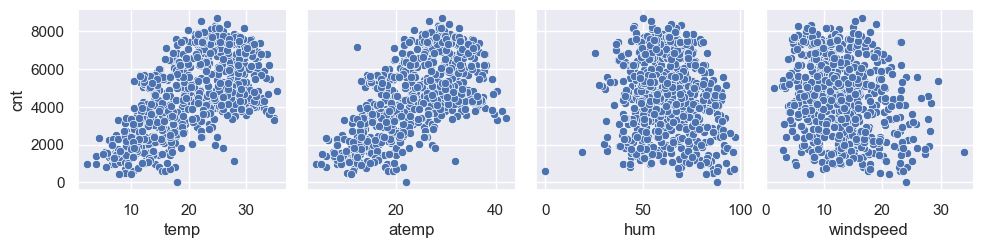

In [231]:
sns.pairplot(data, x_vars = ['temp', 'atemp', 'hum', 'windspeed'], y_vars = 'cnt');

Clearly `temp` and `atemp` significantly influence the `cnt`. However, since `temp` indicates actual temperature and `atemp` indicates temperature felt, both of these variables are likely to have extremely strong correlation between them. This is demonstrated below.

In [232]:
data['temp'].corr(data['atemp'])

0.9916961786905648

The `atemp` variable is more qualitative in nature since it is related to public opinion, while `temp` indicates the actual measured temperature. So from a data and business perspective, using `temp` instead of `atemp` makes much more sense.

In [233]:
data.drop('atemp', axis = 1, inplace = True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayofmonth
0,1,2018,1,0,6,0,2,14.110847,80.5833,10.749882,985,1
1,1,2018,1,0,0,0,2,14.902598,69.6087,16.652113,801,2
2,1,2018,1,0,1,1,1,8.050924,43.7273,16.636703,1349,3
3,1,2018,1,0,2,1,1,8.200000,59.0435,10.739832,1562,4
4,1,2018,1,0,3,1,1,9.305237,43.6957,12.522300,1600,5


Next we will see the variability of `cnt` for the features `weekday`, `holiday`, `workingday` and `weathersit`.

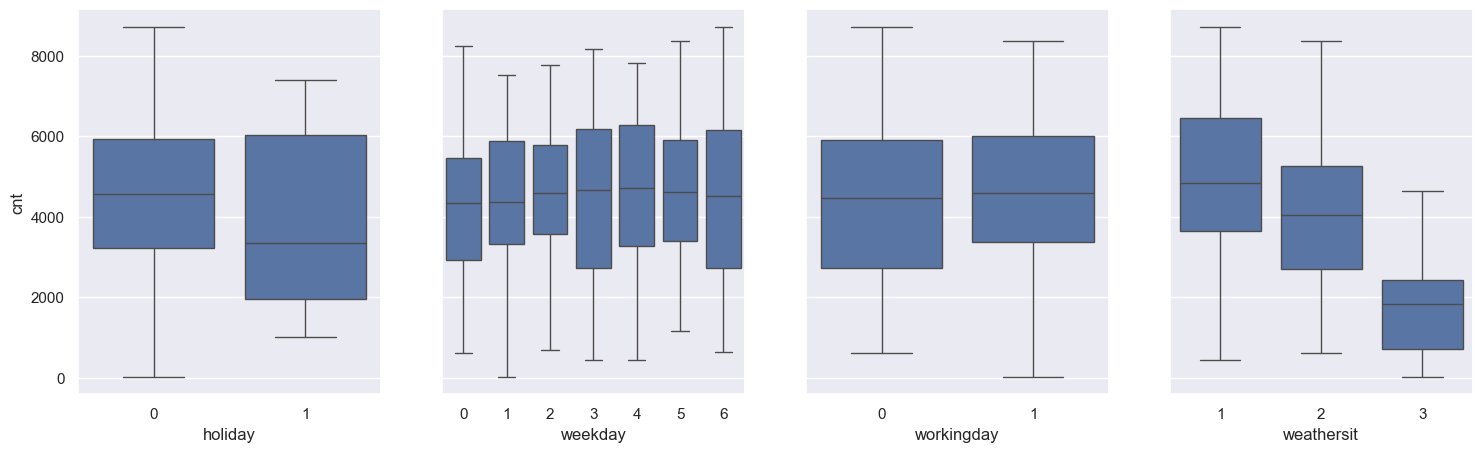

In [234]:
fig, ax = plt.subplots(1, 4, sharey = True);
sns.boxplot(data = data, x = 'holiday', y = 'cnt', ax = ax[0]);
sns.boxplot(data = data, x = 'weekday', y = 'cnt', ax = ax[1]);
sns.boxplot(data = data, x = 'workingday', y = 'cnt', ax = ax[2]);
sns.boxplot(data = data, x = 'weathersit', y = 'cnt', ax = ax[3]);

The variability is influenced most significantly by `holiday` and `weathersit` as demand is generally higher on days that are not holidays. Interestingly, it does not matter much whether it is a weekday or a working day for a customer to rent a bike. 

Similarly, for worsening weather conditions, as indicated in the data dictionary for categories 1, 2, and 3, the renals significantly drop due to obvious reasons.

Let us now check the same for `seasons`.

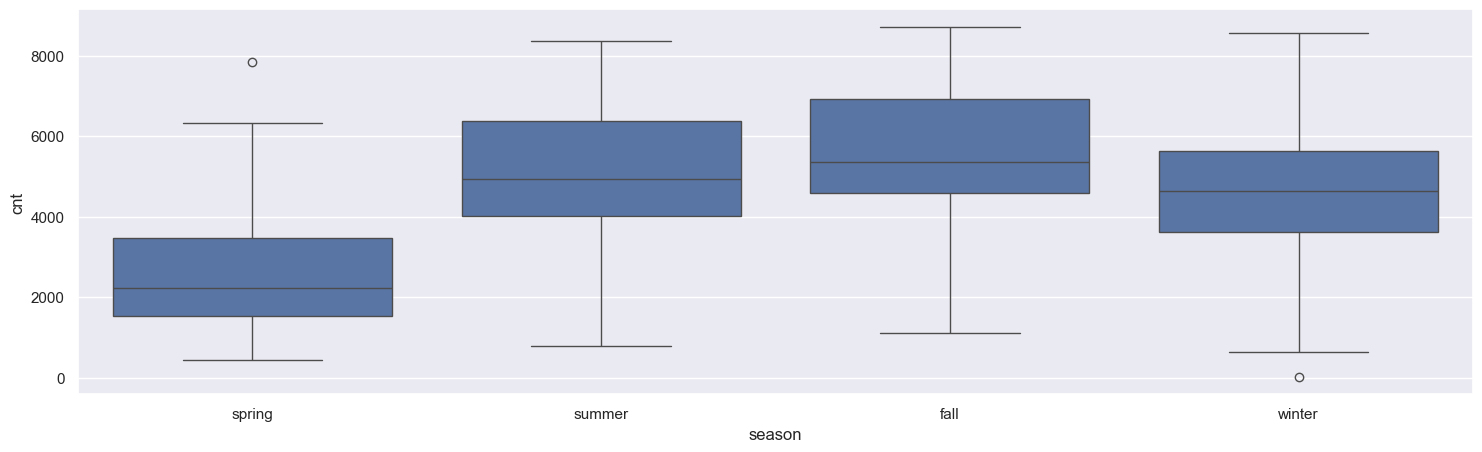

In [235]:
data[['season']] = data[['season']].apply(lambda x: x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}))
sns.boxplot(data = data, x = 'season', y = 'cnt');

Strong variability across `seasons`. One possibility can be that during summer and fall more people are commuting to offices and universities and winter and spring have less demand due to the cold weather. This variable also has a cycle similar to `month`, because they essentially convey the same information.


With this, let us now proceed to building models to quantfiably explain which variables actually drive the demand for bike rentals.

## Part II: Data Preprocessing

#### 2.1. Encoding & Train/Test Split

Let us first encode the `weathersit` variable to make it more comprehensible.

In [236]:
data[['weathersit']] = data[['weathersit']].apply(lambda x: x.map({1: 'clear', 2: 'mist', 3: 'lightrain', 4: 'heavyrain'}))
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayofmonth
0,spring,2018,1,0,6,0,mist,14.110847,80.5833,10.749882,985,1
1,spring,2018,1,0,0,0,mist,14.902598,69.6087,16.652113,801,2
2,spring,2018,1,0,1,1,clear,8.050924,43.7273,16.636703,1349,3
3,spring,2018,1,0,2,1,clear,8.200000,59.0435,10.739832,1562,4
4,spring,2018,1,0,3,1,clear,9.305237,43.6957,12.522300,1600,5


We noted earlier that `season` and `month` have similar cycles and convey similar information. We can drop the variable `season` since `month` is more quantitative in the sense that a month has definite beginnning and end dates and it will better aid with the business strategy.

Now, we encode the `weathersit` and `season` variables.

In [237]:
df = pd.concat([data, pd.get_dummies(data['weathersit'], drop_first = True).astype(int)], axis = 1)
df.drop('weathersit', axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,dayofmonth,lightrain,mist
0,spring,2018,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,1
1,spring,2018,1,0,0,0,14.902598,69.6087,16.652113,801,2,0,1
2,spring,2018,1,0,1,1,8.050924,43.7273,16.636703,1349,3,0,0
3,spring,2018,1,0,2,1,8.200000,59.0435,10.739832,1562,4,0,0
4,spring,2018,1,0,3,1,9.305237,43.6957,12.522300,1600,5,0,0


In [238]:
df = pd.concat([df, pd.get_dummies(df['season'], drop_first = True).astype(int)], axis = 1)
df.drop('season', axis = 1, inplace = True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,dayofmonth,lightrain,mist,spring,summer,winter
0,2018,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,1,1,0,0
1,2018,1,0,0,0,14.902598,69.6087,16.652113,801,2,0,1,1,0,0
2,2018,1,0,1,1,8.050924,43.7273,16.636703,1349,3,0,0,1,0,0
3,2018,1,0,2,1,8.200000,59.0435,10.739832,1562,4,0,0,1,0,0
4,2018,1,0,3,1,9.305237,43.6957,12.522300,1600,5,0,0,1,0,0


Next, we encode `yr`.

In [239]:
df = pd.concat([df, pd.get_dummies(df['yr'], drop_first = True).astype(int)], axis = 1)
df.drop('yr', axis = 1, inplace = True)
df.head()

,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,dayofmonth,lightrain,mist,spring,summer,winter,2019
0,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,1,1,0,0,0
1,1,0,0,0,14.902598,69.6087,16.652113,801,2,0,1,1,0,0,0
2,1,0,1,1,8.050924,43.7273,16.636703,1349,3,0,0,1,0,0,0
3,1,0,2,1,8.200000,59.0435,10.739832,1562,4,0,0,1,0,0,0
4,1,0,3,1,9.305237,43.6957,12.522300,1600,5,0,0,1,0,0,0


Next, we split the dataset into training and test sets.

In [240]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 42)
print(df_train.shape, df_test.shape)

(584, 15) (146, 15)


#### 2.2. Scaling

In [241]:
scalecols = [col for col in df if df[col].nunique() > 2]
scalecols

['mnth', 'weekday', 'temp', 'hum', 'windspeed', 'cnt', 'dayofmonth']

In [242]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df_train[scalecols] = sc.fit_transform(df_train[scalecols])
df_train.describe()

,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,dayofmonth,lightrain,mist,spring,summer,winter,2019
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.508250,0.032534,0.493436,0.672945,0.551484,0.654151,0.410017,0.520520,0.488356,0.032534,0.344178,0.229452,0.250000,0.255137,0.511986
std,0.311733,0.177566,0.336045,0.469540,0.227249,0.146644,0.187249,0.224926,0.294401,0.177566,0.475507,0.420841,0.433384,0.436312,0.500285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.000000,0.166667,0.000000,0.354266,0.542745,0.276424,0.371088,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545455,0.000000,0.500000,1.000000,0.566998,0.657578,0.379465,0.523527,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.818182,0.000000,0.833333,1.000000,0.745598,0.757346,0.520978,0.691872,0.733333,0.000000,1.000000,0.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that the data is properly scaled, we move on to the next phase of our analysis, i.e. data modelling.

## Part III: Data Modelling

In [243]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.shape

(584, 14)

For this analysis, we shall make use of the Linear Regression model, which provides the best explainability and simplicity among other models. Since the foccus is more on investigating the key drivers and the extent of their influence over bike rentals, it is perfectly fine for a model to have a low predictive power as long as it is highly explainable. That said, we shall aim to build a model with decent to high predictive power.

Since we only have 10 potential predictors, it does not make sense to have an automated approach here. We shall use the following method to come up with the best model that fits the data.

- Start with all predictors
- Repeat until all predictors are significant and have VIF < 5:
    - Repeat until all predictors are significant:
        - Fit model, then check for insignificant predictors (p-value > 0.05)
        - Remmove the most insignificant predictor
    - Repeat until all predictors have VIF < 5:
        - Check VIF for all remaining predictors
        - Remove predictor if VIF > 5.

#### 3.1. Model 1: All features

In [244]:
from statsmodels.api import OLS, add_constant

X_train_lm = X_train[[2019, 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
                     'dayofmonth', 'lightrain', 'mist', 'spring', 'summer', 'winter']]
X_train_lm = add_constant(X_train_lm)
lm1 = OLS(endog = y_train, exog = X_train_lm, hasconst = True)
results = lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     188.2
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          7.57e-203
Time:                        11:11:34   Log-Likelihood:                 547.75
No. Observations:                 584   AIC:                            -1065.
Df Residuals:                     569   BIC:                            -1000.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2871      0.040      7.169      0.000       0.208       0.366
2019           0.2289      0.008     28.350      0.000       0.213       0.245
mnth          -0.0364      0.025     -1.467      0.143      -0.085       0.012
holiday       -0.0578      0.023     -2.472      0.014      -0.104      -0.012
weekday        0.0469      0.012      3.925      0.000       0.023       0.070
workingday     0.0160      0.009      1.806      0.071      -0.001       0.033
temp           0.4728      0.033     14.371      0.000       0.408       0.537
hum           -0.1109      0.037     -2.970      0.003      -0.184      -0.038
windspeed     -0.1306      0.023     -5.654      0.000      -0.176      -0.085
dayofmonth    -0.0237      0.014     -1.749      0.081      -0.050       0.003
lightrain     -0.2418      0.026     -9.401      0.000      -0.292      -0.191
mist          -0.0518      0.011     -4.906      0.000      -0.072      -0.031
spring        -0.1120      0.023     -4.910      0.000      -0.157      -0.067
summer         0.0289      0.014      2.001      0.046       0.001       0.057
winter         0.0930      0.017      5.431      0.000       0.059       0.127
==============================================================================
Omnibus:                       67.207   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.237
Skew:                          -0.615   Prob(JB):                     9.72e-36
Kurtosis:                       5.261   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.2. Model 2: Removing `mnth`

In [245]:
X_train_lm = X_train[[2019, 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
                     'dayofmonth', 'lightrain', 'mist', 'spring', 'summer', 'winter']]
X_train_lm = add_constant(X_train_lm)
lm2 = OLS(endog = y_train, exog = X_train_lm, hasconst = True)
results = lm2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     202.1
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          1.52e-203
Time:                        11:11:34   Log-Likelihood:                 546.65
No. Observations:                 584   AIC:                            -1065.
Df Residuals:                     570   BIC:                            -1004.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2681      0.038      7.068      0.000       0.194       0.343
2019           0.2285      0.008     28.290      0.000       0.213       0.244
holiday       -0.0598      0.023     -2.559      0.011      -0.106      -0.014
weekday        0.0469      0.012      3.920      0.000       0.023       0.070
workingday     0.0163      0.009      1.842      0.066      -0.001       0.034
temp           0.4731      0.033     14.365      0.000       0.408       0.538
hum           -0.1164      0.037     -3.130      0.002      -0.189      -0.043
windspeed     -0.1298      0.023     -5.617      0.000      -0.175      -0.084
dayofmonth    -0.0236      0.014     -1.736      0.083      -0.050       0.003
lightrain     -0.2418      0.026     -9.393      0.000      -0.292      -0.191
mist          -0.0516      0.011     -4.884      0.000      -0.072      -0.031
spring        -0.0964      0.020     -4.774      0.000      -0.136      -0.057
summer         0.0387      0.013      3.002      0.003       0.013       0.064
winter         0.0835      0.016      5.264      0.000       0.052       0.115
==============================================================================
Omnibus:                       67.714   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.359
Skew:                          -0.626   Prob(JB):                     2.49e-35
Kurtosis:                       5.232   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are no more statistically insignificant features. We shall now check for multicollinearity using the VIF.

#### 3.3. Model 3: Removing `dayofmonth`

In [246]:
X_train_lm = X_train[[2019, 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
                     'lightrain', 'mist', 'spring', 'summer', 'winter']]
X_train_lm = add_constant(X_train_lm)
lm3 = OLS(endog = y_train, exog = X_train_lm, hasconst = True)
results = lm3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          4.51e-204
Time:                        11:11:34   Log-Likelihood:                 545.11
No. Observations:                 584   AIC:                            -1064.
Df Residuals:                     571   BIC:                            -1007.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2598      0.038      6.892      0.000       0.186       0.334
2019           0.2284      0.008     28.226      0.000       0.213       0.244
holiday       -0.0592      0.023     -2.529      0.012      -0.105      -0.013
weekday        0.0468      0.012      3.901      0.000       0.023       0.070
workingday     0.0159      0.009      1.789      0.074      -0.002       0.033
temp           0.4741      0.033     14.373      0.000       0.409       0.539
hum           -0.1219      0.037     -3.285      0.001      -0.195      -0.049
windspeed     -0.1311      0.023     -5.663      0.000      -0.177      -0.086
lightrain     -0.2409      0.026     -9.343      0.000      -0.292      -0.190
mist          -0.0502      0.011     -4.762      0.000      -0.071      -0.030
spring        -0.0963      0.020     -4.761      0.000      -0.136      -0.057
summer         0.0389      0.013      3.019      0.003       0.014       0.064
winter         0.0842      0.016      5.305      0.000       0.053       0.115
==============================================================================
Omnibus:                       74.670   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.010
Skew:                          -0.680   Prob(JB):                     1.34e-39
Kurtosis:                       5.347   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.4. Model 4: Removing `workingday`

In [247]:
X_train_lm = X_train[[2019, 'holiday', 'weekday', 'temp', 'hum', 'windspeed',
                     'lightrain', 'mist', 'spring', 'summer', 'winter']]
X_train_lm = add_constant(X_train_lm)
lm4= OLS(endog = y_train, exog = X_train_lm, hasconst = True)
results = lm4.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     236.5
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          1.40e-204
Time:                        11:11:34   Log-Likelihood:                 543.48
No. Observations:                 584   AIC:                            -1063.
Df Residuals:                     572   BIC:                            -1011.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.191      0.000       0.196       0.343
2019           0.2281      0.008     28.141      0.000       0.212       0.244
holiday       -0.0698      0.023     -3.078      0.002      -0.114      -0.025
weekday        0.0472      0.012      3.929      0.000       0.024       0.071
temp           0.4781      0.033     14.502      0.000       0.413       0.543
hum           -0.1233      0.037     -3.316      0.001      -0.196      -0.050
windspeed     -0.1328      0.023     -5.733      0.000      -0.178      -0.087
lightrain     -0.2391      0.026     -9.263      0.000      -0.290      -0.188
mist          -0.0492      0.011     -4.665      0.000      -0.070      -0.029
spring        -0.0954      0.020     -4.708      0.000      -0.135      -0.056
summer         0.0399      0.013      3.087      0.002       0.015       0.065
winter         0.0853      0.016      5.364      0.000       0.054       0.117
==============================================================================
Omnibus:                       79.064   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.798
Skew:                          -0.731   Prob(JB):                     3.34e-40
Kurtosis:                       5.309   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now have a model that has 82% R-squared score and no statistically insignificant predictor. Let us now test for multicollinearity.

In [248]:
X_train_lm_cols = [2019, 'holiday', 'weekday', 'temp', 'hum', 'windspeed',
                  'lightrain', 'mist', 'spring', 'summer', 'winter']
X_train_lm = X_train[X_train_lm_cols]

from statsmodels.stats.outliers_influence import variance_inflation_factor
for col in X_train_lm_cols:
    print(f'{col} = {variance_inflation_factor(X_train_lm, X_train_lm.columns.get_loc(col))}')

2019 = 2.071047198167112
holiday = 1.049340418824717
weekday = 3.0345384338850376
temp = 14.825548745927822
hum = 26.11019603414286
windspeed = 5.443633454981328
lightrain = 1.2895678971472648
mist = 2.240702049345938
spring = 3.5686676614294277
summer = 2.1648555604273523
winter = 2.9225331384954933


Here, `hum` has a VIF score of 26.11 which is unacceptibly high. Humidity can be estimated by the season and other weather conditions such as windspeed and whether there is light rain or not, etc., so it makes sense. We will try removing it and see whether it impacts the current model in any adverse way.

#### 3.5. Model 5: Removing `hum`

In [249]:
X_train_lm = X_train[[2019, 'holiday', 'weekday', 'temp', 'windspeed',
                     'lightrain', 'mist', 'spring', 'summer', 'winter']]
X_train_lm = add_constant(X_train_lm)
lm5 = OLS(endog = y_train, exog = X_train_lm, hasconst = True)
results = lm5.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     254.6
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          1.95e-203
Time:                        11:11:34   Log-Likelihood:                 537.92
No. Observations:                 584   AIC:                            -1054.
Df Residuals:                     573   BIC:                            -1006.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1976      0.031      6.404      0.000       0.137       0.258
2019           0.2318      0.008     28.627      0.000       0.216       0.248
holiday       -0.0691      0.023     -3.020      0.003      -0.114      -0.024
weekday        0.0504      0.012      4.180      0.000       0.027       0.074
temp           0.4600      0.033     14.026      0.000       0.396       0.524
windspeed     -0.1118      0.022     -4.974      0.000      -0.156      -0.068
lightrain     -0.2767      0.023    -11.832      0.000      -0.323      -0.231
mist          -0.0699      0.009     -8.127      0.000      -0.087      -0.053
spring        -0.0985      0.020     -4.829      0.000      -0.139      -0.058
summer         0.0381      0.013      2.928      0.004       0.013       0.064
winter         0.0778      0.016      4.901      0.000       0.047       0.109
==============================================================================
Omnibus:                       74.167   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.160
Skew:                          -0.704   Prob(JB):                     3.72e-36
Kurtosis:                       5.173   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and adj. R-squared scores are still around 82%, all predictors being statistically significant. So removing the redundant column was the correct choice. Now let us test for multicollinearity again.

In [250]:
X_train_lm_cols = [2019, 'holiday', 'weekday', 'temp', 'windspeed',
                  'lightrain', 'mist', 'spring', 'summer', 'winter']
X_train_lm = X_train[X_train_lm_cols]

from statsmodels.stats.outliers_influence import variance_inflation_factor
for col in X_train_lm_cols:
    print(f'{col} = {variance_inflation_factor(X_train_lm, X_train_lm.columns.get_loc(col))}')

2019 = 2.061103196859516
holiday = 1.0486642109500564
weekday = 3.0182825802388784
temp = 4.804583983547058
windspeed = 5.4419990806643606
lightrain = 1.0980387223603498
mist = 1.5518929039905163
spring = 2.0823531395911488
summer = 1.8560367319513271
winter = 1.7180567749899927


The `windspeed` column has a VIF of 5.44, which again is beyond acceptable range. For similar reaaons as `hum` it would make sense to mark this column too as redundant and drop it. However, let us test.

#### 3.6. Model 6: Removing `windspeed`

In [251]:
X_train_lm = X_train[[2019, 'holiday', 'weekday', 'temp',
                     'lightrain', 'mist', 'spring', 'summer', 'winter']]
X_train_lm = add_constant(X_train_lm)
lm6 = OLS(endog = y_train, exog = X_train_lm, hasconst = True)
results = lm6.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     269.0
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          2.02e-199
Time:                        11:11:34   Log-Likelihood:                 525.57
No. Observations:                 584   AIC:                            -1031.
Df Residuals:                     574   BIC:                            -987.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1399      0.029      4.795      0.000       0.083       0.197
2019           0.2320      0.008     28.071      0.000       0.216       0.248
holiday       -0.0697      0.023     -2.986      0.003      -0.116      -0.024
weekday        0.0525      0.012      4.266      0.000       0.028       0.077
temp           0.4793      0.033     14.423      0.000       0.414       0.545
lightrain     -0.2936      0.024    -12.432      0.000      -0.340      -0.247
mist          -0.0698      0.009     -7.949      0.000      -0.087      -0.053
spring        -0.0977      0.021     -4.694      0.000      -0.139      -0.057
summer         0.0327      0.013      2.471      0.014       0.007       0.059
winter         0.0848      0.016      5.258      0.000       0.053       0.117
==============================================================================
Omnibus:                       76.145   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.446
Skew:                          -0.706   Prob(JB):                     7.99e-39
Kurtosis:                       5.284   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
X_train_lm_cols = [2019, 'holiday', 'weekday', 'temp',
                  'lightrain', 'mist', 'spring', 'summer', 'winter']
X_train_lm = X_train[X_train_lm_cols]

from statsmodels.stats.outliers_influence import variance_inflation_factor
for col in X_train_lm_cols:
    print(f'{col} = {variance_inflation_factor(X_train_lm, X_train_lm.columns.get_loc(col))}')

2019 = 2.059552920678779
holiday = 1.0477624832002872
weekday = 3.006502609753761
temp = 3.5071381075521533
lightrain = 1.066792521290804
mist = 1.5490697575708108
spring = 1.4867294036889145
summer = 1.607448036059436
winter = 1.5439312513111079


We now have a model with around 81% R-squared and adjusted R-squared accuracy and zero multicollinearity among predictors. This is now a pretty good fit and we can move on to the next step, i.e. testing the model for stability.

## Part IV: Testing Model Stability

For testing model stability, we shall look at whether the model upholds the various assumptions of linear regression. In particular, we shall check:

- Whether the residuals are normally distributed with zero mean
- Whether the residuals have constant variance
- Whether the residuals are independent

For this, we shall use the final model to obtain predictions on the training set and quickly check how close the predictions are to the actual values.

In [253]:
X_train_lm = add_constant(X_train_lm)
y_train_pred = results.predict(X_train_lm)
y_train_pred

247    0.376036
335    0.420853
702    0.723137
440    0.528713
136    0.420523
         ...   
71     0.236436
106    0.410062
270    0.525216
435    0.526337
102    0.340183
Length: 584, dtype: float64

0.8990844332887336


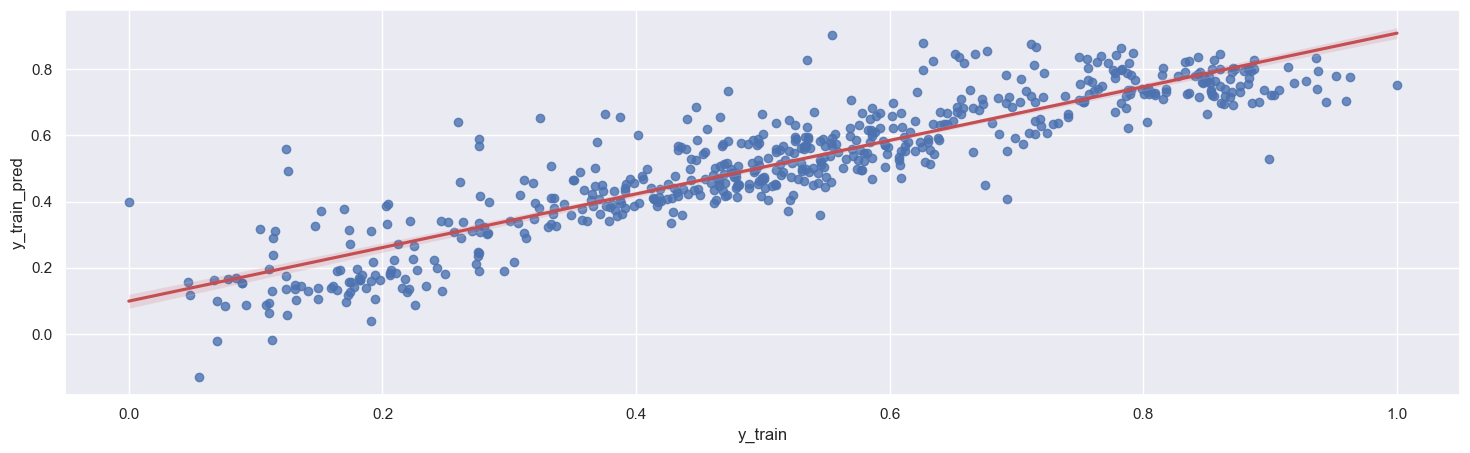

In [254]:
print(y_train.corr(y_train_pred))

sns.regplot(x = y_train.values, y =  y_train_pred, line_kws = {'color': 'r'});
plt.xlabel('y_train');
plt.ylabel('y_train_pred');

As we can see, `y_train_pred` and `y_train` are highly linearly correlated.

#### 4.1. Testing normalcy of residuals

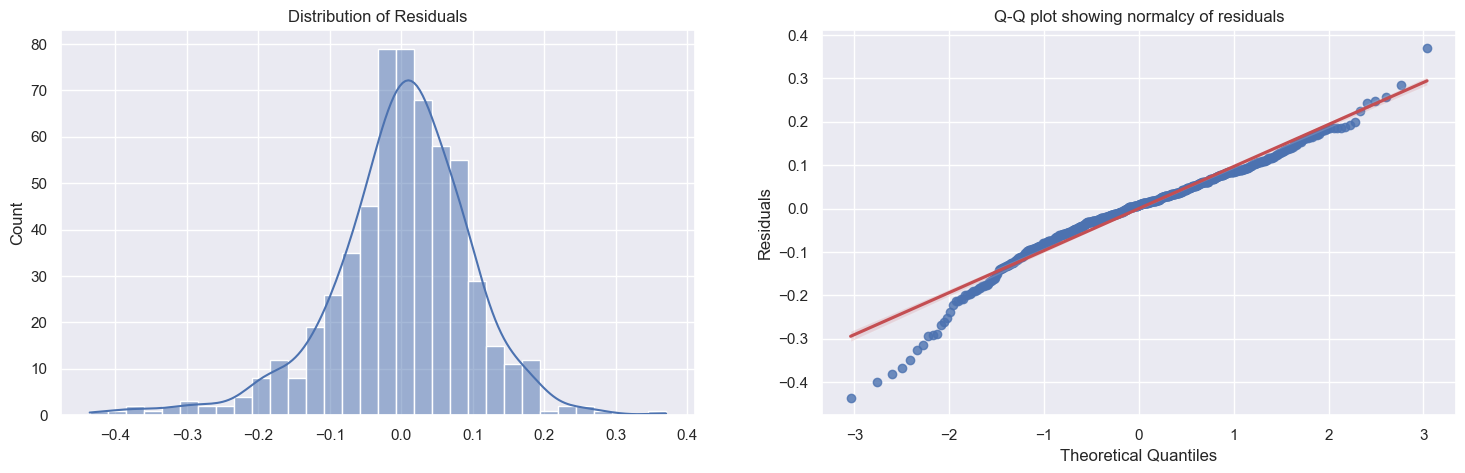

In [255]:
import scipy.stats as ss

res = y_train - y_train_pred
fig, ax = plt.subplots(1, 2)

sns.histplot(res, kde = True, ax = ax[0]);
ax[0].set_title('Distribution of Residuals');

qth, res = ss.probplot(res)[0]
sns.regplot(x = qth, y = res, ax = ax[1], line_kws = {'color': 'r'});
ax[1].set_xlabel('Theoretical Quantiles');
ax[1].set_ylabel('Residuals');
ax[1].set_title('Q-Q plot showing normalcy of residuals');

From the Q-Q plot, we can see that the residuals very closely resemble the theoretical quantiles obtained from a normal distribution. This means that they have constant or near-constant variance, since theoretical normal distribution has constant variance.

#### 4.2. Testing for heteroscedasticity

In [256]:
res_df = X_train_lm.drop('const', axis = 1)
res_df['res'] = res
res_df.head()

,2019,holiday,weekday,temp,lightrain,mist,spring,summer,winter,res
247,0,1,0.166667,0.765327,0,1,0,0,0,-0.435658
335,0,0,0.833333,0.317788,0,0,0,0,1,-0.399390
702,1,0,0.333333,0.519232,0,0,0,0,1,-0.380752
440,1,0,1.000000,0.566998,0,1,1,0,0,-0.367763
136,0,0,0.333333,0.626185,0,1,0,1,0,-0.349452


We shall now check for equal variances of residuals across categories of binary predictors via one-way ANOVA.

In [257]:
anova_df = []
for col in res_df.columns:
    if col not in ['weekday', 'temp', 'res']:
        p = ss.f_oneway(res_df.loc[res_df[col] == 0, 'res'], res_df.loc[res_df[col] == 1, 'res']).pvalue
        anova_df.append({'column': col, 'p_value': p, 'diff_var': 1 if p < 0.05 else 0})

p = ss.f_oneway(*(res_df.loc[res_df['weekday'] == val, 'res'] for val in res_df['weekday'].unique())).pvalue
anova_df.append({'column': 'weekday', 'p_value': p, 'diff_var': 1 if p < 0.05 else 0})

anova_df = pd.DataFrame(anova_df)
anova_df

,column,p_value,diff_var
0,2019,0.246847,0
1,holiday,0.022730,1
2,lightrain,0.177947,0
3,mist,0.513676,0
4,spring,0.920484,0
5,summer,0.110289,0
6,winter,0.233875,0
7,weekday,0.304789,0


Except for `holiday`, the variance of residuals across all levels of all categorical predictors is constant. Let us now see the same for `temp`.

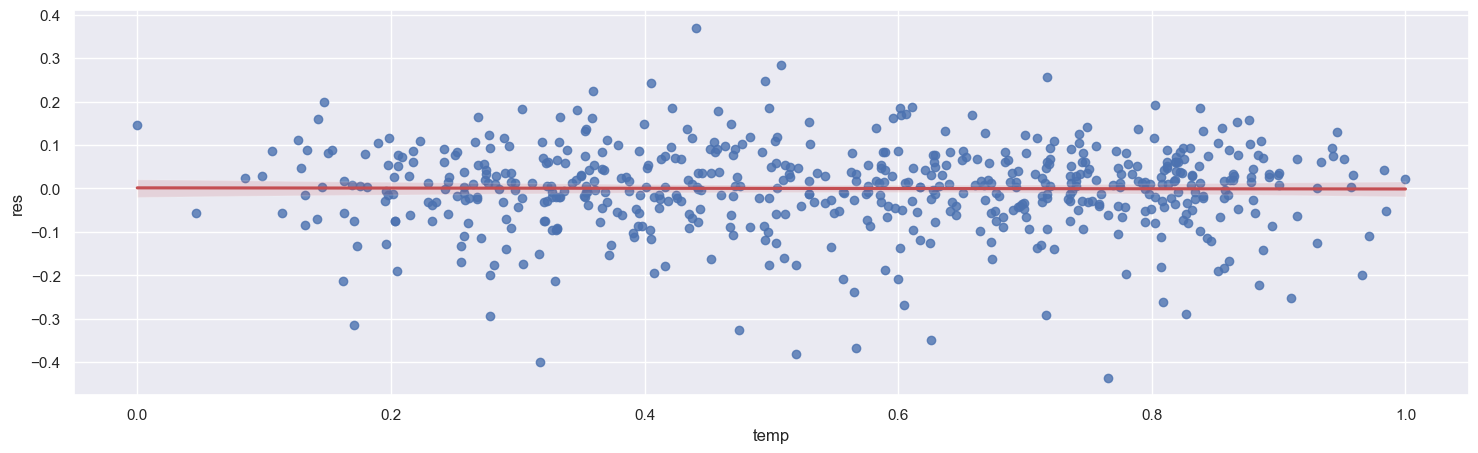

In [258]:
sns.regplot(data = res_df, x = 'temp', y = 'res', line_kws = {'color': 'r'});

From the plot, it is apparent that the variance of residuals show no recognizable pattern with respect to `temp`.

We can now conclude that our model is reliable. Let us now see how well it generalizes to the test set.

## Part V: Model Validation

Let us first transform the test set in the same way we transformed the training set.

In [259]:
df_test[scalecols] = sc.transform(df_test[scalecols])
y_test = df_test.pop('cnt')
X_test = df_test

In [260]:
X_test_lm = add_constant(X_test)
X_test_lm = X_test_lm[X_train_lm.columns]
y_test_pred = results.predict(X_test_lm)

In [262]:
from sklearn.metrics import r2_score

print(f'R-squared score for test set = {r2_score(y_test, y_test_pred)}')

R-squared score for test set = 0.8413159772133015


The R-squared score for test set is 84%, which is close to the R-squared for training set (81%). This means that this is a very good and stable model that generalizes well to unseen data.

## Part VI: Conclusion and Inference

Now that we have the model fitted and validated, we are ready to answer the business questions originally asked.

#### 6.1. Which factors are significant predictors for bike sharing demand?

- The year. There is a generally upward annual trend which has been demonstrated at the beginning of this analysis.
- Whether or not it is a holiday.
- Whether or not it is a weekday.
- Temperature of the day.
- Whether the weather is Light Snow or Light Rain + Thunderstorm + Scattered clouds or Light Rain + Scattered clouds.
- Whether the weather is Mist + Cloudy or Mist + Broken clouds or Mist + Few clouds or just Mist.
- The seasons, particularly if it's spring or summer or winter.

### 6.2. How well do these factors influence the demand?

In [265]:
results.params * 100

const        13.992647
2019         23.198276
holiday      -6.973116
weekday       5.251467
temp         47.933108
lightrain   -29.359244
mist         -6.975676
spring       -9.773360
summer        3.269874
winter        8.483892
dtype: float64

Given other factors are unchanged, each individual factor influences the demand in the following way:

- The YoY growth is about 23.2% (based on 2018 and 2019 data).
- If it's a holiday, then the demand decreases by around 7%.
- Demand goes up by 5.3% on weekdays.
- A unit degree C rise in temperature shoots up the demand by around 48%.
- If there is a thunderstorm or light rain/snow then the demand goes down by 29.4%.
- On the other hand if the weather is cloudy and/or misty then the demand decreases by about 7%.
- On springs the demand is down by around 9.8%, while on summers it is up by 3.3%.
- On winters, demand shoots up by 8.5%.

It is clear that weather and temperature plays a significant role in influencing the bike sharing demand, since bad weather and cold temperatures will drive down the demand. Other than the weather, demand is generally higher on holidays and weekdays than weekends. One possible reason could be that on holidays people are more active and going on leisure or adventure rides on bikes. On weekdays the bikes are possibly being used for office commute.